# Assignment 2

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

## Data handle

In [71]:
df = pd.read_csv('/Users/pro/Desktop/CS503 Data visualization/assignment/movies.csv'); df.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083,146083,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876,10876,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134,203134,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615,373615,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819,1087521,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0


In [72]:
df.shape

(3201, 16)

In [73]:
df.dtypes

Title                      object
US Gross                   object
Worldwide Gross            object
US DVD Sales              float64
Production Budget         float64
Release Date               object
MPAA Rating                object
Running Time (min)        float64
Distributor                object
Source                     object
Major Genre                object
Creative Type              object
Director                   object
Rotten Tomatoes Rating    float64
IMDB Rating               float64
IMDB Votes                float64
dtype: object

## Data Clean
deleating NA; Na replace 0

In [74]:
df = df.replace('Unknown',0)
df[['US Gross','Worldwide Gross']]=pd.DataFrame(df[['US Gross','Worldwide Gross']],dtype=np.int
df = df.drop(df.loc[df['US Gross'] == 0].index)
sum(df['Worldwide Gross']==0)


SyntaxError: invalid syntax (<ipython-input-74-00850ec8a7c9>, line 3)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   3201 non-null   object 
 1   US Gross                3201 non-null   object 
 2   Worldwide Gross         3201 non-null   object 
 3   US DVD Sales            564 non-null    float64
 4   Production Budget       3200 non-null   float64
 5   Release Date            3201 non-null   object 
 6   MPAA Rating             2596 non-null   object 
 7   Running Time (min)      1209 non-null   float64
 8   Distributor             2969 non-null   object 
 9   Source                  2836 non-null   object 
 10  Major Genre             2926 non-null   object 
 11  Creative Type           2755 non-null   object 
 12  Director                1870 non-null   object 
 13  Rotten Tomatoes Rating  2321 non-null   float64
 14  IMDB Rating             2988 non-null   

In [76]:
df.describe()

,US DVD Sales,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
count,5.640000e+02,3.200000e+03,1209.000000,2321.000000,2988.000000,2988.000000
mean,3.490155e+07,3.106917e+07,110.193548,54.336924,6.283467,29908.644578
std,4.589512e+07,3.558591e+07,20.171014,28.076593,1.252290,44937.582335
min,6.184540e+05,2.180000e+02,46.000000,1.000000,1.400000,18.000000
25%,9.906211e+06,6.575000e+06,95.000000,30.000000,5.600000,4828.500000
50%,2.033156e+07,2.000000e+07,107.000000,55.000000,6.400000,15106.000000
75%,3.779422e+07,4.200000e+07,121.000000,80.000000,7.200000,35810.500000
max,3.525821e+08,3.000000e+08,222.000000,100.000000,9.200000,519541.000000


In [77]:
df.corr()

,US DVD Sales,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
US DVD Sales,1.000000,0.592022,0.276087,0.212593,0.209237,0.511408
Production Budget,0.592022,1.000000,0.348830,-0.088740,0.015312,0.339755
Running Time (min),0.276087,0.348830,1.000000,0.295653,0.387499,0.404181
Rotten Tomatoes Rating,0.212593,-0.088740,0.295653,1.000000,0.743118,0.335410
IMDB Rating,0.209237,0.015312,0.387499,0.743118,1.000000,0.467389
IMDB Votes,0.511408,0.339755,0.404181,0.335410,0.467389,1.000000


### Strong relationship
US Gross and Worldwide Gross;US DVD Sales
IMDB Rating and Rotten Tomatoes Rating

In [78]:
list1 = ['US Gross','Worldwide Gross','US DVD Sales','Production Budget','Running Time (min)',
        'Rotten Tomatoes Rating','IMDB Rating','IMDB Votes']
list2 = ['US Gross','Worldwide Gross','US DVD Sales','Production Budget','Running Time (min)',
        'Rotten Tomatoes Rating','IMDB Rating','IMDB Votes']

In [79]:
harvest = np.array([[1.000000,0.939616,0.741940,0.624038,0.263259,0.181010,0.197641,0.551073],
                  [0.939616,1.000000,0.702979,0.666663,0.318583,0.160706,0.198389,0.550649],
                  [0.741940,0.702979,1.000000,0.592952,0.276087,0.213212,0.206674,0.510475],
                  [0.624038,0.666663,0.592952,1.000000,0.349629,-0.085564,0.015943,0.337578],
                  [0.263259,0.318583,0.276087,0.349629,1.000000,0.295653,0.388156,0.405342],
                  [0.181010,0.160706,0.213212,-0.085564,0.295653,1.000000,0.744358,0.340113],
                  [0.197641,0.198389,0.206674,0.015943,0.388156,0.744358,1.000000,0.469697],
                  [0.551073,0.550649,0.510475,0.337578,0.405342,0.340113,0.469697,1.000000]])

[Text(0, 0.5, 'US Gross'),
 Text(0, 1.5, 'Worldwide Gross'),
 Text(0, 2.5, 'US DVD Sales'),
 Text(0, 3.5, 'Production Budget'),
 Text(0, 4.5, 'Running Time (min)'),
 Text(0, 5.5, 'Rotten Tomatoes Rating'),
 Text(0, 6.5, 'IMDB Rating'),
 Text(0, 7.5, 'IMDB Votes')]

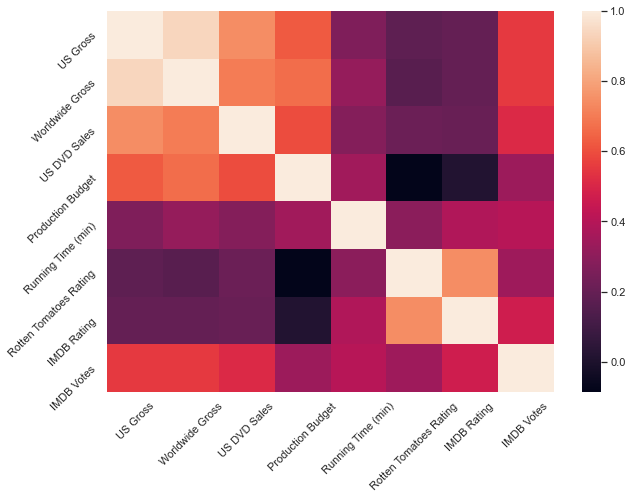

In [80]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
fig = plt.figure(figsize=(10,7))
ax = sns.heatmap(harvest)

ax.set_xticklabels(list1,rotation=45)
ax.set_yticklabels(list2,rotation=45)

In [81]:
df_new = df[['US Gross','Worldwide Gross','Production Budget']]

In [82]:
df_new.dropna()

,US Gross,Worldwide Gross,Production Budget
0,146083,146083,8000000.0
1,10876,10876,300000.0
2,203134,203134,250000.0
3,373615,373615,300000.0
4,1009819,1087521,1000000.0
...,...,...,...
3196,31452765,36851125,24000000.0
3197,33080084,83080084,85000000.0
3198,11989328,12506188,35000000.0
3199,45575336,141475336,80000000.0


In [83]:
df_new_US = pd.to_numeric( df_new['US Gross'], errors='coerce').fillna('0').astype('int32')
df_new_WG = pd.to_numeric( df_new['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_new_PG = pd.to_numeric( df_new['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [84]:
data = [df_new_US,df_new_WG,df_new_PG]

In [85]:
data = np.array(data)

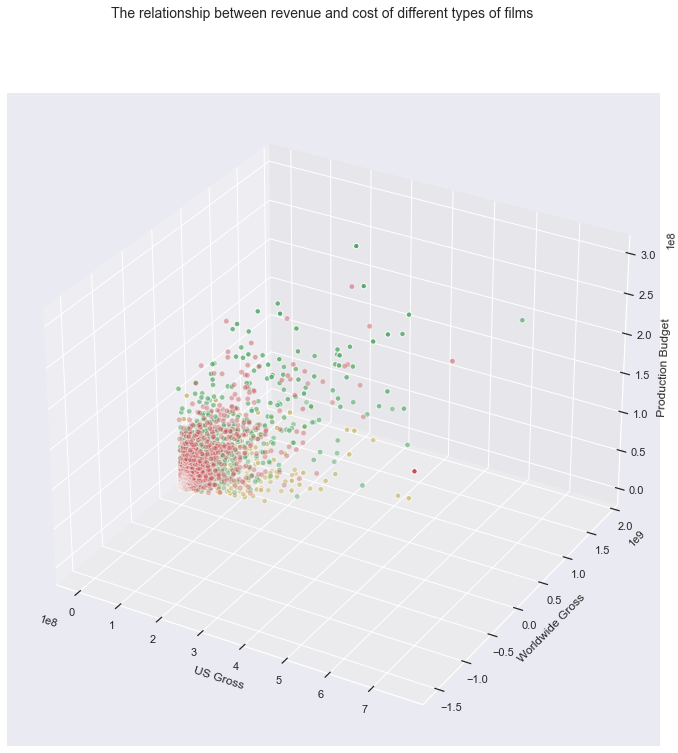

In [89]:
fig = plt.figure(figsize=(12,12))
x, y, z = data[0], data[1], data[2]
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x[:1000], y[:1000], z[:1000], c='y',edgecolor='w',s=30)  # 绘制数据点
ax.scatter(x[1000:2000], y[1000:2000], z[1000:2000], c='r',edgecolor='w',s=30)
ax.scatter(x[2000:3201], y[2000:3201], z[2000:3201], c='g',edgecolor='w',s=30)

fig.suptitle('The relationship between revenue and cost of different types of films', fontsize=14)
ax.set_zlabel('Production Budget')  # 坐标轴
ax.set_ylabel('Worldwide Gross')
ax.set_xlabel('US Gross')
plt.show()


In [90]:
df_new = df[['US Gross','Worldwide Gross','Major Genre','Production Budget']]

In [91]:
df_new = df_new.dropna()

In [92]:
df_new = df_new.set_index(['Major Genre'])

In [93]:
df_Drama = df_new.loc['Drama']

In [94]:
df_Drama_UG = pd.to_numeric( df_Drama['US Gross'], errors='coerce').fillna('0').astype('int32')

In [95]:
df_Drama_UG.mean()

29230308.433460075

In [96]:
df_Drama_WW = pd.to_numeric( df_Drama['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')

In [97]:
df_Drama_WW.mean()

51300594.36375158

In [98]:
df_Drama_PB = pd.to_numeric( df_Drama['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [99]:
df_Drama_PB.mean()

22582019.78453739

In [100]:
df_Comedy = df_new.loc['Comedy']

In [101]:
df_Comedy_UG = pd.to_numeric( df_Comedy['US Gross'], errors='coerce').fillna('0').astype('int32')
df_Comedy_WW = pd.to_numeric( df_Comedy['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_Comedy_PB = pd.to_numeric( df_Comedy['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [102]:
df_Musical = df_new.loc['Musical']

In [103]:
df_Musical_UG = pd.to_numeric( df_Musical['US Gross'], errors='coerce').fillna('0').astype('int32')
df_Musical_WW = pd.to_numeric( df_Musical['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_Musical_PB = pd.to_numeric( df_Musical['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [104]:
df_Thriller_Suspense = df_new.loc['Thriller/Suspense']

In [105]:
df_Thriller_Suspense_UG = pd.to_numeric( df_Thriller_Suspense['US Gross'], errors='coerce').fillna('0').astype('int32')
df_Thriller_Suspense_WW = pd.to_numeric( df_Thriller_Suspense['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_Thriller_Suspense_PB = pd.to_numeric( df_Thriller_Suspense['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [106]:
df_Adventure = df_new.loc['Adventure']

In [107]:
df_Adventure_UG = pd.to_numeric( df_Adventure['US Gross'], errors='coerce').fillna('0').astype('int32')
df_Adventure_WW = pd.to_numeric( df_Adventure['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_Adventure_PB = pd.to_numeric( df_Adventure['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [108]:
df_Action = df_new.loc['Action']

In [109]:
df_Action_UG = pd.to_numeric( df_Action['US Gross'], errors='coerce').fillna('0').astype('int32')
df_Action_WW = pd.to_numeric( df_Action['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_Action_PB = pd.to_numeric( df_Action['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [110]:
df_Romantic_Comedy = df_new.loc['Romantic Comedy']

In [111]:
df_Romantic_Comedy_UG = pd.to_numeric( df_Romantic_Comedy['US Gross'], errors='coerce').fillna('0').astype('int32')
df_Romantic_Comedy_WW = pd.to_numeric( df_Romantic_Comedy['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_Romantic_Comedy_PB = pd.to_numeric( df_Romantic_Comedy['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [112]:
df_Horror = df_new.loc['Horror']

In [113]:
df_Horror_UG = pd.to_numeric( df_Horror['US Gross'], errors='coerce').fillna('0').astype('int32')
df_Horror_WW = pd.to_numeric( df_Horror['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_Horror_PB = pd.to_numeric( df_Horror['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [114]:
df_Western = df_new.loc['Western']

In [115]:
df_Western_UG = pd.to_numeric( df_Western['US Gross'], errors='coerce').fillna('0').astype('int32')
df_Western_WW = pd.to_numeric( df_Western['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_Western_PB = pd.to_numeric( df_Western['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [116]:
df_Documentary = df_new.loc['Documentary']

In [117]:
df_Documentary_UG = pd.to_numeric( df_Documentary['US Gross'], errors='coerce').fillna('0').astype('int32')
df_Documentary_WW = pd.to_numeric( df_Documentary['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_Documentary_PB = pd.to_numeric( df_Documentary['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [118]:
df_Black_Comedy = df_new.loc['Black Comedy']

In [119]:
df_Black_Comedy_UG = pd.to_numeric( df_Black_Comedy['US Gross'], errors='coerce').fillna('0').astype('int32')
df_Black_Comedy_WW = pd.to_numeric( df_Black_Comedy['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_Black_Comedy_PB = pd.to_numeric( df_Black_Comedy['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [120]:
df_Concert_Performance = df_new.loc['Concert/Performance']

In [121]:
df_Concert_Performance_UG = pd.to_numeric( df_Concert_Performance['US Gross'], errors='coerce').fillna('0').astype('int32')
df_Concert_Performance_WW = pd.to_numeric( df_Concert_Performance['Worldwide Gross'], errors='coerce').fillna('0').astype('int32')
df_Concert_Performance_PB = pd.to_numeric( df_Concert_Performance['Production Budget'], errors='coerce').fillna('0').astype('int32')

In [122]:
list1 =['Drama','Comedy','Musical','Thriller/Suspense','Adventure','Action','Romantic Comedy','Horror','Western','Documentary',
       'Black Comedy','Concert/Performance']

In [123]:
list_UG_mean = [df_Drama_UG.mean(),df_Comedy_UG.mean(),df_Musical_UG.mean(),
               df_Thriller_Suspense_UG.mean(),df_Adventure_UG.mean(),df_Action_UG.mean(),
               df_Romantic_Comedy_UG.mean(),df_Horror_UG.mean(),df_Western_UG.mean(),df_Documentary_UG.mean(),
               df_Black_Comedy_UG.mean(),df_Concert_Performance_UG.mean()]

In [124]:
list_WW_mean = [df_Drama_WW.mean(),df_Comedy_WW.mean(),df_Musical_WW.mean(),
               df_Thriller_Suspense_WW.mean(),df_Adventure_WW.mean(),df_Action_WW.mean(),
               df_Romantic_Comedy_WW.mean(),df_Horror_WW.mean(),df_Western_WW.mean(),df_Documentary_WW.mean(),
               df_Black_Comedy_WW.mean(),df_Concert_Performance_WW.mean()]

In [125]:
list_PB_mean=[df_Drama_PB.mean(),df_Comedy_PB.mean(),df_Musical_PB.mean(),
               df_Thriller_Suspense_PB.mean(),df_Adventure_PB.mean(),df_Action_PB.mean(),
               df_Romantic_Comedy_PB.mean(),df_Horror_PB.mean(),df_Western_PB.mean(),df_Documentary_PB.mean(),
               df_Black_Comedy_PB.mean(),df_Concert_Performance_PB.mean()]

In [126]:
data = np.array([list_UG_mean,list_WW_mean,list_PB_mean])

In [127]:
data = np.log(data)

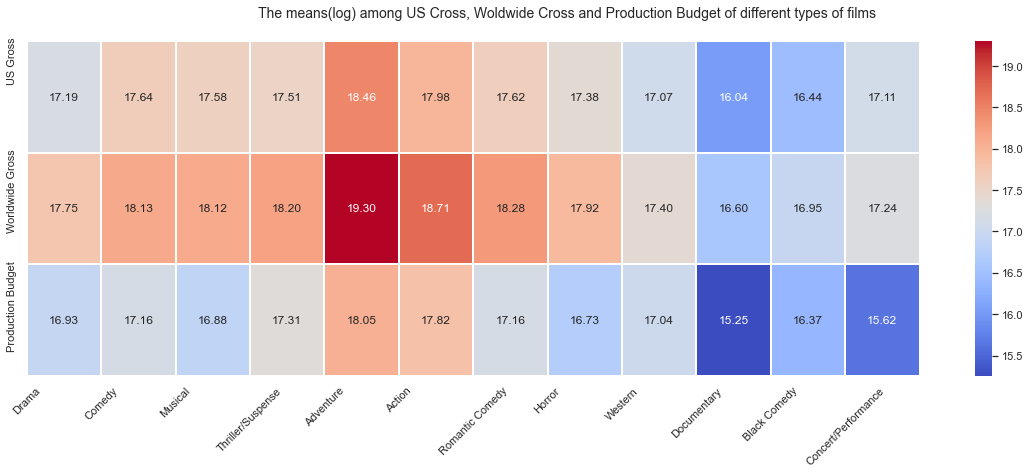

In [130]:
import seaborn as sns; sns.set(color_codes=True)
f, ax = plt.subplots(figsize=(20, 6))
hm = sns.heatmap(data, annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.9)

plt.yticks([0,1,2],['US Gross','Worldwide Gross','Production Budget'])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Drama','Comedy','Musical','Thriller/Suspense','Adventure','Action','Romantic Comedy','Horror','Western','Documentary','Black Comedy','Concert/Performance']
          ,rotation=45)

t= f.suptitle('The means(log) among US Cross, Woldwide Cross and Production Budget of different types of films', fontsize=14)

### The result

In [133]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

import numpy as np
import pandas as pd

# import watermark

# %load_ext watermark
# %matplotlib inline

data = [82, 97, 124, 89, 125, 89, 112, 119, 36, 135, 58, 162]
pos = np.arange(0, 12, 1)
width = 0.5



Text(0.5, 1.0, 'The difference of Worldwide Gross and Production Budget ')

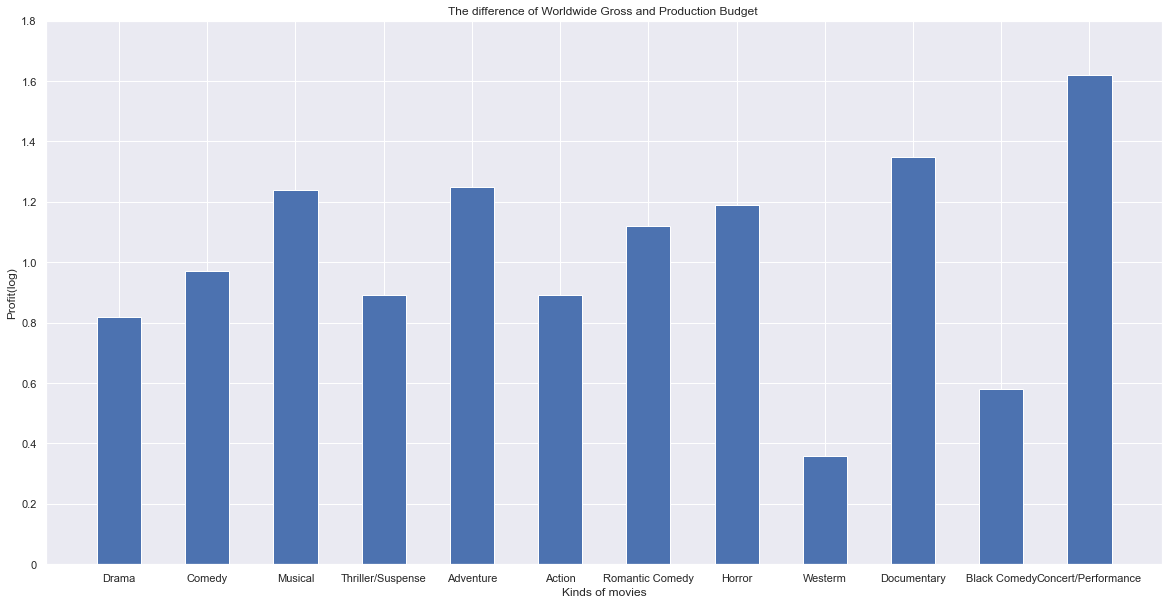

In [134]:
fig, ax = plt.subplots(1)
fig.set_size_inches(20,10)

rects1 = ax.bar(pos, data, width,  label='Data')

ax.set_ylabel('Profit(log)')
ax.set_xlabel('Kinds of movies')
ax.set_xticks(pos)
ax.set_yticks([0,20,40,60,80,100,120,140,160,180])
ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8])
ax.set_xticklabels(('Drama', 'Comedy', 'Musical', 'Thriller/Suspense','Adventure','Action','Romantic Comedy','Horror','Westerm','Documentary','Black Comedy','Concert/Performance'))
ax.set_title('The difference of Worldwide Gross and Production Budget ')
